# Проведем анализ данных, полученных на предыдуших шагах с использование SQL запросов.

Файл /datasets/query_1.csv содержит результат первого запроса. В нём содержится информация о:
model — модели самолета
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
Файл /datasets/query_3.csv содержит результат третьего запроса. В нём содержится информация о:
city — городах
average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года.

Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Чтение данных из файла /datasets/query_1.csv

In [2]:
flights_amount_on_model = pd.read_csv('/datasets/query_1.csv')

In [3]:
flights_amount_on_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
flights_amount_on_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Пропуски и несоответствие данных типам данных не выявлены. Предобработка данных не требуется.

Чтение данных из файла /datasets/query_3.csv'.

In [5]:
average_flights_on_city = pd.read_csv('/datasets/query_3.csv') #/datasets/query_3.csv

In [6]:
average_flights_on_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
average_flights_on_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Пропуски и несоответствие данных типам данных не выявлены. Предобработка данных не требуется.

Выберем топ-10 городов по количеству рейсов. Для этого отсортируем таблицу *average_flights_on_city* по столбцу 'average_flights' по убыванию и выведим первые 10 строк.

In [8]:
top_10_city = average_flights_on_city.sort_values(by = 'average_flights', ascending = False).head(10)
top_10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Построим график: модели самолетов и количество рейсов

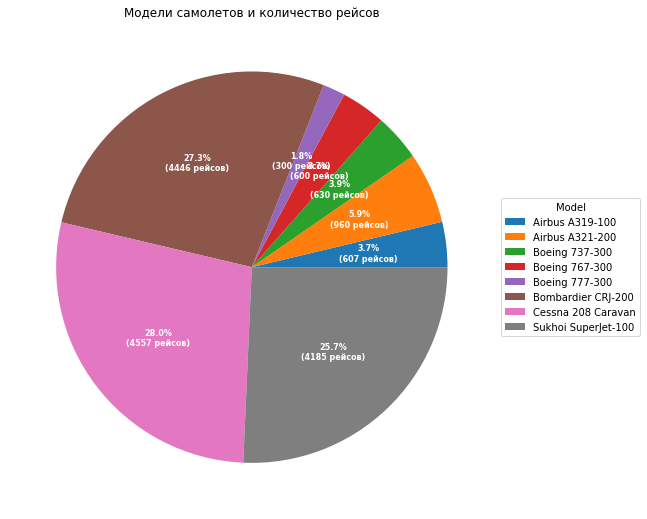

In [9]:
fig, ax = plt.subplots(figsize=(18, 9), subplot_kw=dict(aspect="equal"))

recipe = flights_amount_on_model['model'].to_list()

flights_amount = flights_amount_on_model['flights_amount']
model = flights_amount_on_model['model']


def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} рейсов)".format(pct, absolute)


#wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
#                                  textprops=dict(color="w"))
wedges, texts, autotexts = ax.pie(flights_amount, autopct=lambda pct: func(pct, flights_amount), textprops=dict(color="w"))

ax.legend(wedges, model,
          title="Model",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Модели самолетов и количество рейсов")

plt.show()

Наибольшая доля в рейсах, - 28,8%, приходится на полеты Cessna 208 Cаravan, приблизительно одинаково 9,4% и 9,5% приходится на полеты Boeing и Airbus соответственно.

Построим график: города и количество рейсов

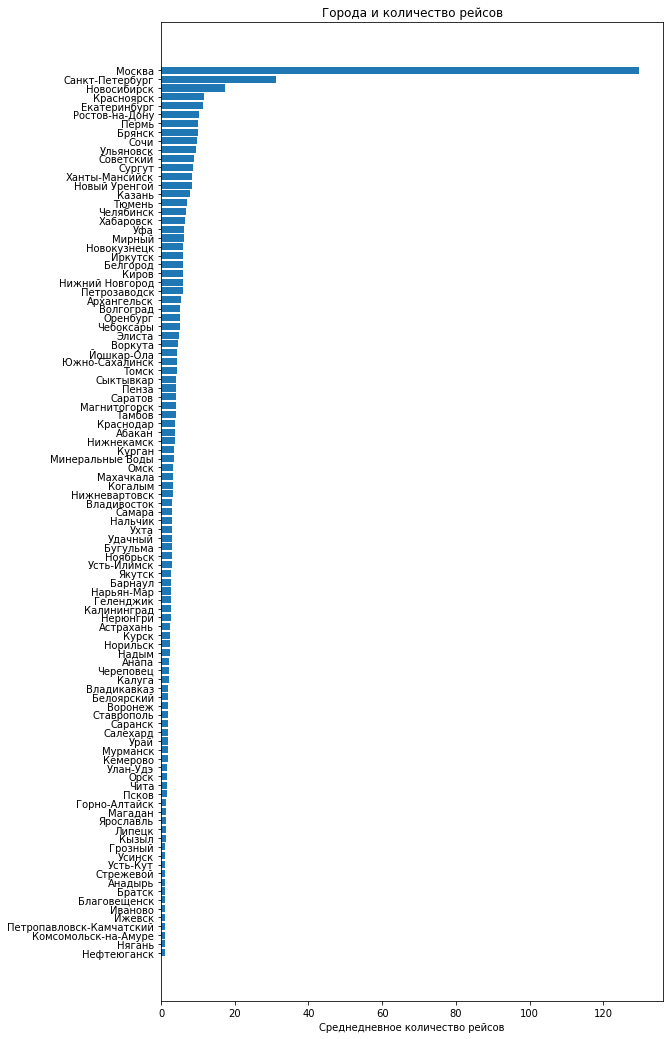

In [10]:
fig, ax = plt.subplots(figsize=(9, 18))
city = average_flights_on_city.sort_values(by = 'average_flights', ascending = False)['city']
x_values = average_flights_on_city.sort_values(by = 'average_flights', ascending = False)['average_flights']
y_pos = np.arange(len(x_values))
ax.barh(y_pos, x_values)
ax.set_yticks(y_pos)
ax.set_yticklabels(city) # Подписи для оси y
ax.invert_yaxis()  # Сортировка по убыванию
ax.set_xlabel('Среднедневное количество рейсов')
ax.set_title('Города и количество рейсов')

plt.show()

Наибольшее количество среднедневных рейсов в Москве - более 120 рейсов, присутствуют города с 1 рейсом в день.

Построим график: топ-10 городов и количество рейсов

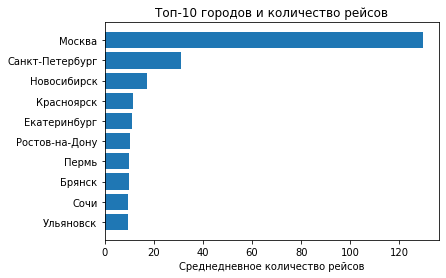

In [11]:
fig, ax = plt.subplots()
city = top_10_city['city']
x_values = top_10_city['average_flights']
y_pos = np.arange(len(x_values))
ax.barh(y_pos, x_values)
ax.set_yticks(y_pos)
ax.set_yticklabels(city) # Подписи для оси y
ax.invert_yaxis()  # Сортировка по убыванию
ax.set_xlabel('Среднедневное количество рейсов')
ax.set_title('Топ-10 городов и количество рейсов')

plt.show()

Среди городов с наибольщим количеством ежедневных рейсов - города федерального значения и областные города, кроме того в топ-10 входит город Сочи.

### Общий вывод: 
Такие инструменты как парсинг данных и SQL запросы являются мощными средствами в инструментарии аналитика данных. По результатам анализа установлено, что наибольшая доля в рейсах, - 28,8%, приходится на полеты Cessna 208 Cаravan, приблизительно одинаково 9,4% и 9,5% приходится на полеты Boeing и Airbus соответственно.
Среднедневное количество рейсов колеблится от 1 рейса в Нефтеюганске до 123 в Москве.
Среди городов с наибольщим количеством ежедневных рейсов - города федерального значения и областные города, кроме того в топ-10 входит город Сочи.